In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
from calendar import month_name, month_abbr
register_matplotlib_converters()

In [2]:
pageviews = pd.read_csv('fcc-forum-pageviews.csv')

In [3]:
#pageviews['date'] = pageviews['date'].apply(pd.to_datetime)

In [4]:
pageviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1304 non-null   object
 1   value   1304 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 20.5+ KB


In [5]:
pageviews['date'] = pageviews['date'].apply(pd.to_datetime)

In [6]:
pageviews.set_index('date', inplace=True)

In [7]:
pageviews.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [8]:
ignore_very_low_pv = pageviews['value'] >= pageviews['value'].quantile(0.025)

In [9]:
ignore_very_high_pv = pageviews['value'] <= pageviews['value'].quantile(0.975)

In [10]:
#pageviews.loc[(ignore_very_low_pv & ignore_very_high_pv)]
print(pageviews['value'].quantile(0.025))
print(pageviews['value'].quantile(0.975))

17876.4
177613.075


In [11]:
pageviews = pageviews.loc[(ignore_very_low_pv & ignore_very_high_pv)]

Text(0.5, 1.0, 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

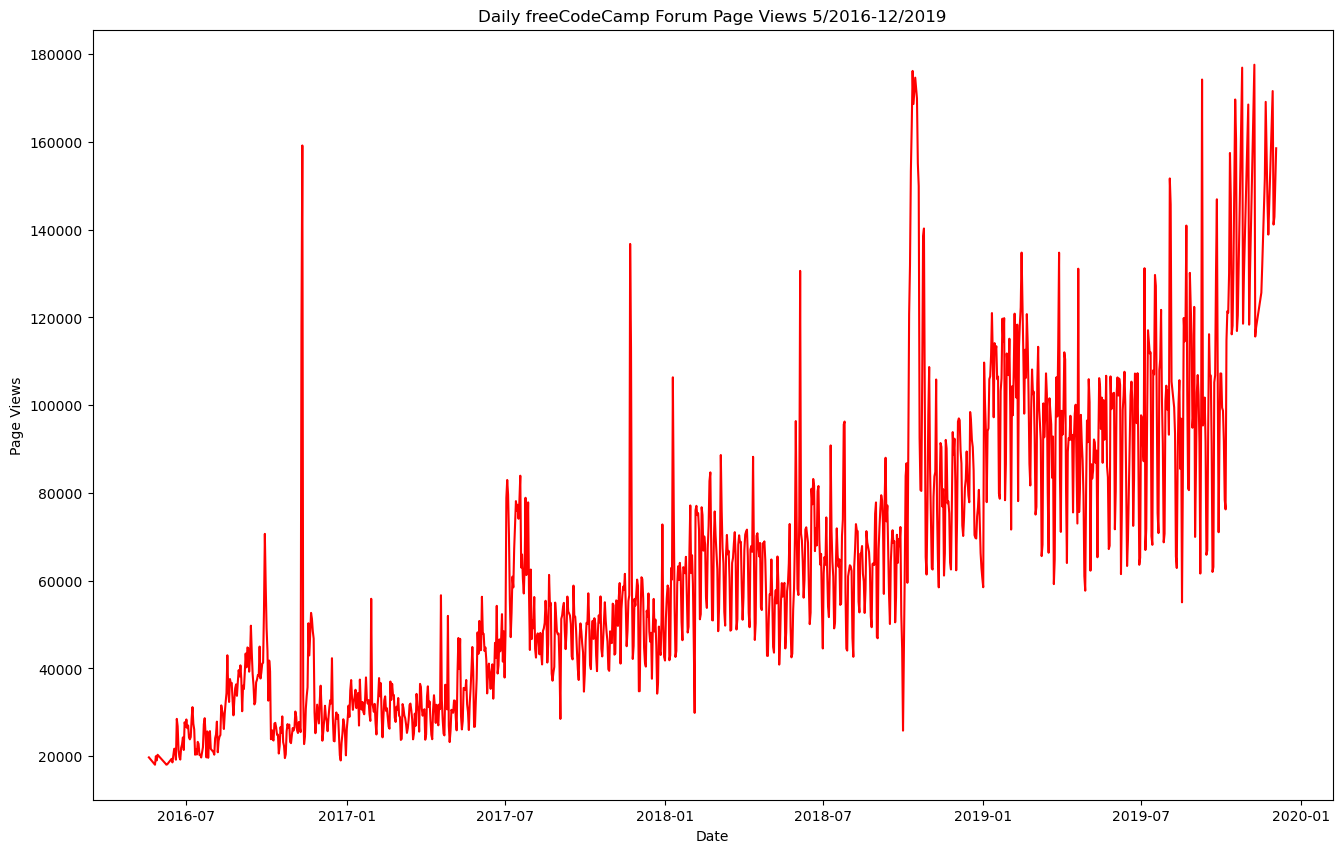

In [12]:
fig, axes = plt.subplots(figsize=(16,10))
timerange_frame = pageviews['5/2016':'12/2019']
axes.plot(timerange_frame.index, timerange_frame.value, color='red')
axes.set_ylabel('Page Views')
axes.set_xlabel('Date')
axes.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

<Axes: xlabel='Years', ylabel='Average Page Views'>

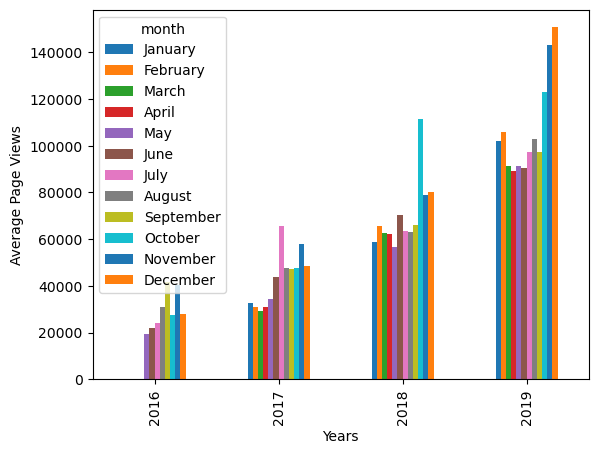

In [13]:
df_bar = pageviews.copy()
df_bar.reset_index(inplace=True)
df_bar['year'] = [d.year for d in df_bar.date]
df_bar['month'] = [d.strftime('%B') for d in df_bar.date]
df_bar.rename(columns={'value':'pageviews'}, inplace=True)

month_name_lookup = list(month_name)
df_bar = df_bar[['month','year', 'pageviews']].groupby(['year', 'month'])['pageviews'].mean().unstack('month')
df_bar = df_bar[sorted(df_bar.columns, key=month_name_lookup.index)]
df_bar.plot(kind='bar', xlabel='Years', ylabel='Average Page Views')

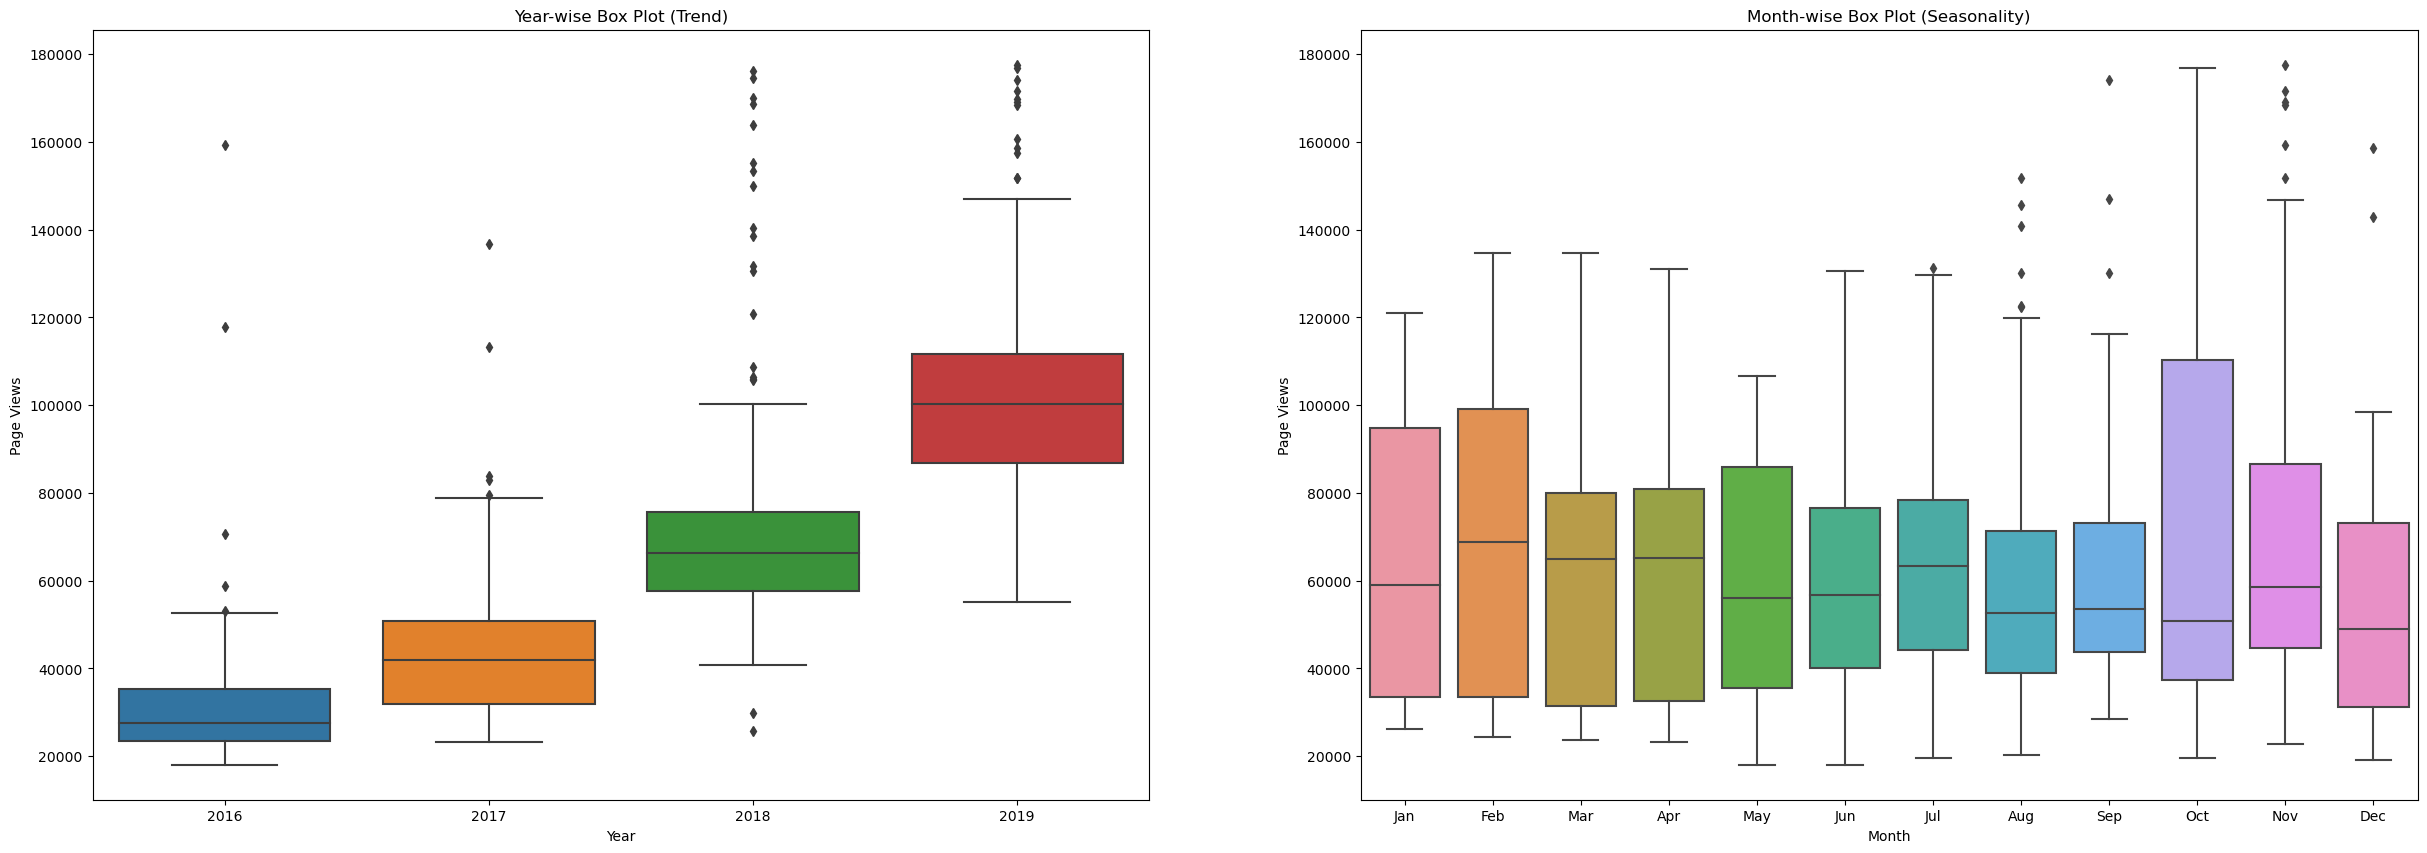

In [14]:
df_box = pageviews.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box.rename(columns={'value':'pageviews'}, inplace=True)


month_name_lookup = list(month_abbr)
df_box_monthly_sorted = df_box.sort_values(by=['month'], key=lambda x : x.apply (lambda x : month_name_lookup.index(x)))


fig, axes = plt.subplots(figsize=(30, 10), nrows=1, ncols=2)
sns.boxplot(df_box, ax=axes[0], x='year', y='pageviews')\
    .set(ylabel='Page Views', xlabel='Year', title='Year-wise Box Plot (Trend)')
sns.boxplot(df_box_monthly_sorted, ax=axes[1], x='month', y='pageviews')\
    .set(ylabel='Page Views', xlabel='Month', title='Month-wise Box Plot (Seasonality)')
plt.show()

.......C:\Users\Wolfi\Documents\Python Scripts\freeCodecampDataAnalysisWithPython\boilerplate-page-view-time-series-visualizer-main\test_module.py:7: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  actual = int(time_series_visualizer.df.count(numeric_only=True))
....
----------------------------------------------------------------------
Ran 11 tests in 2.339s

OK


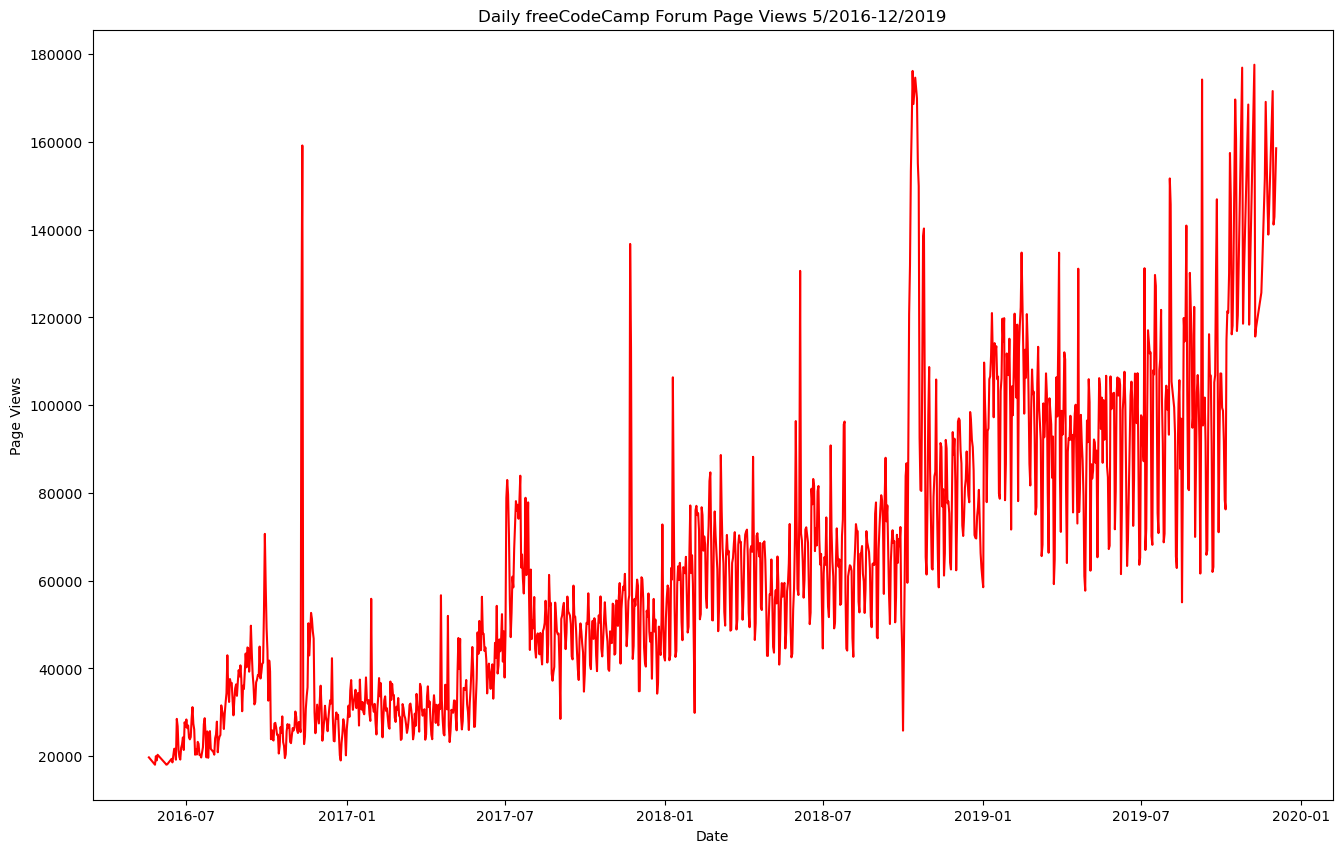

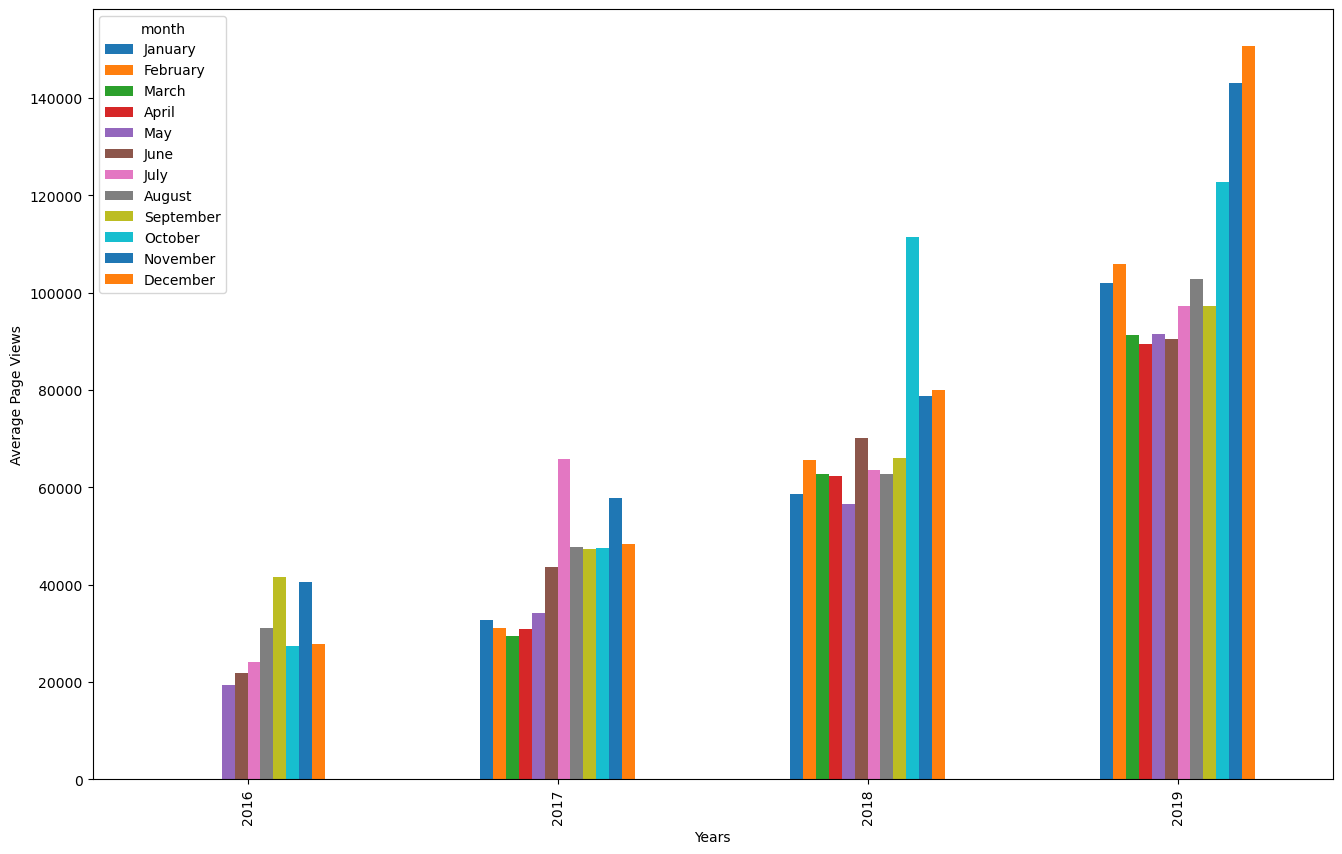

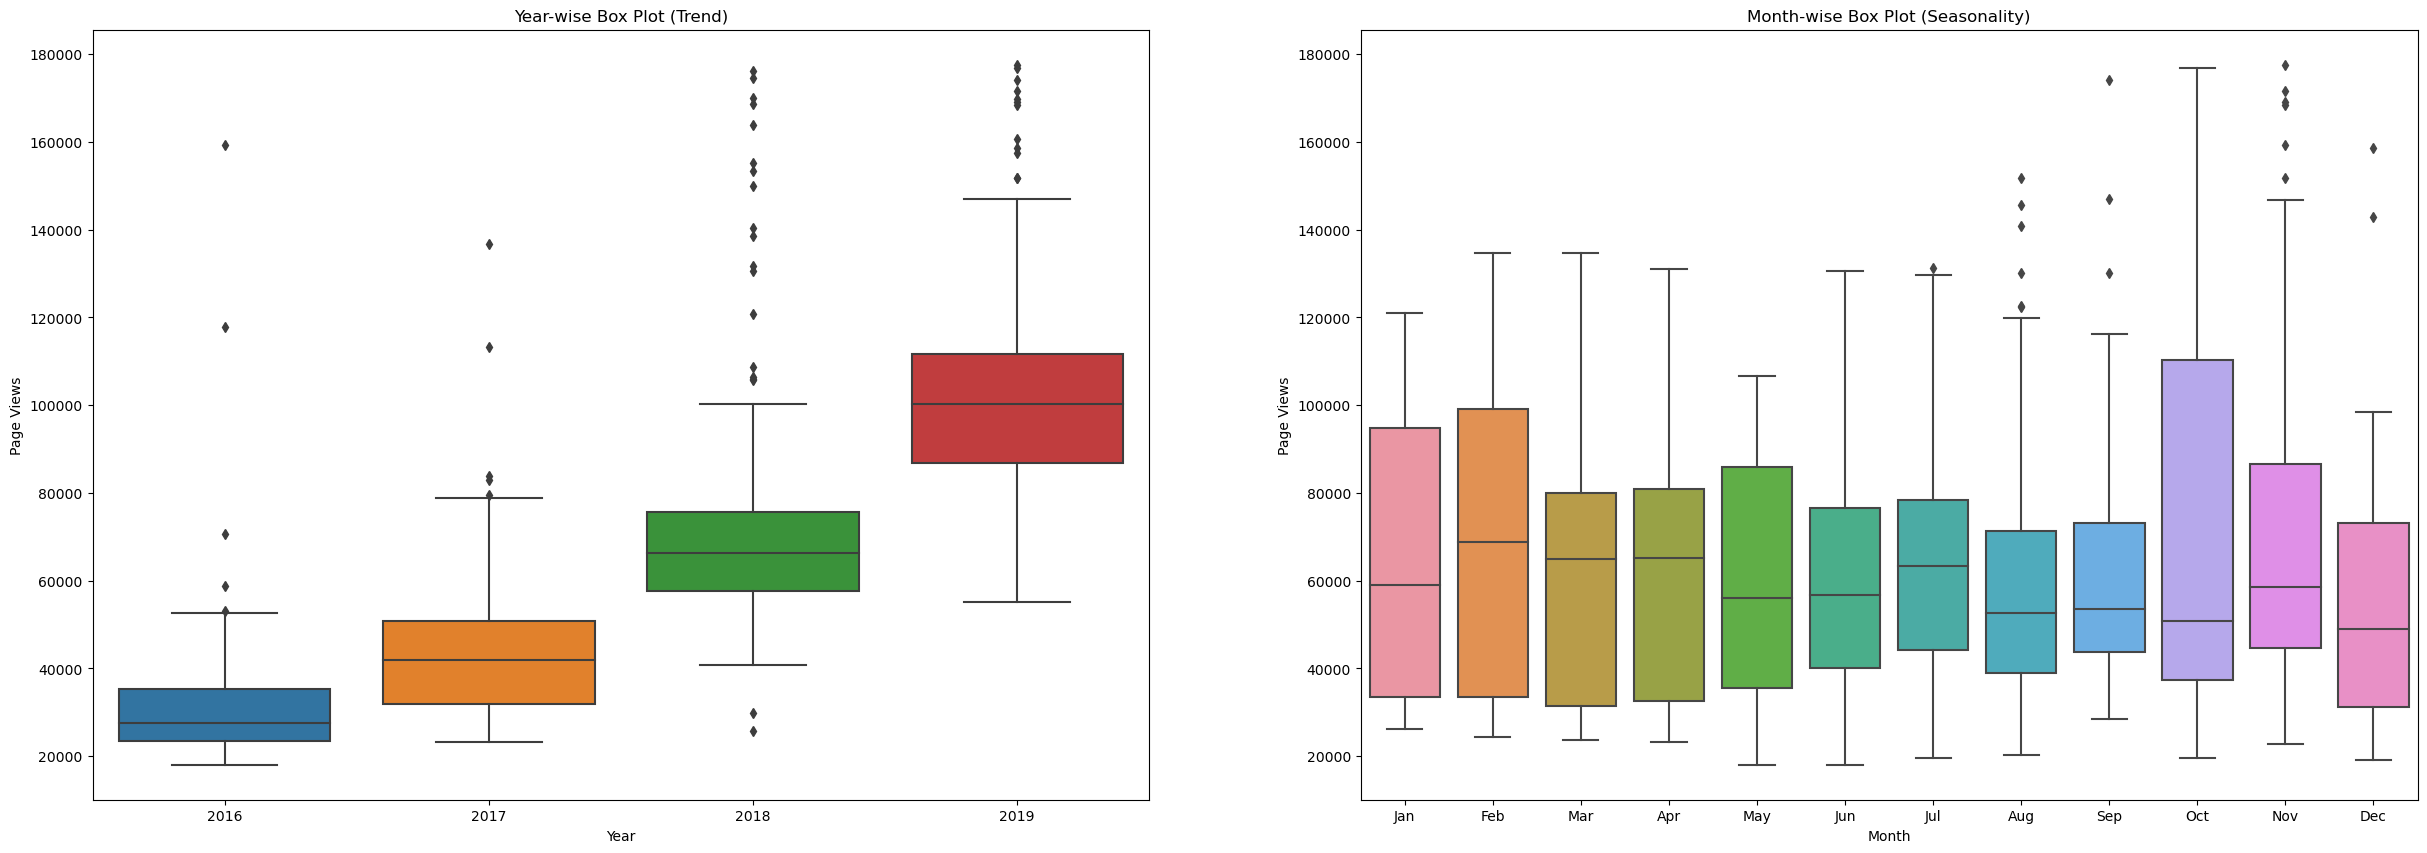

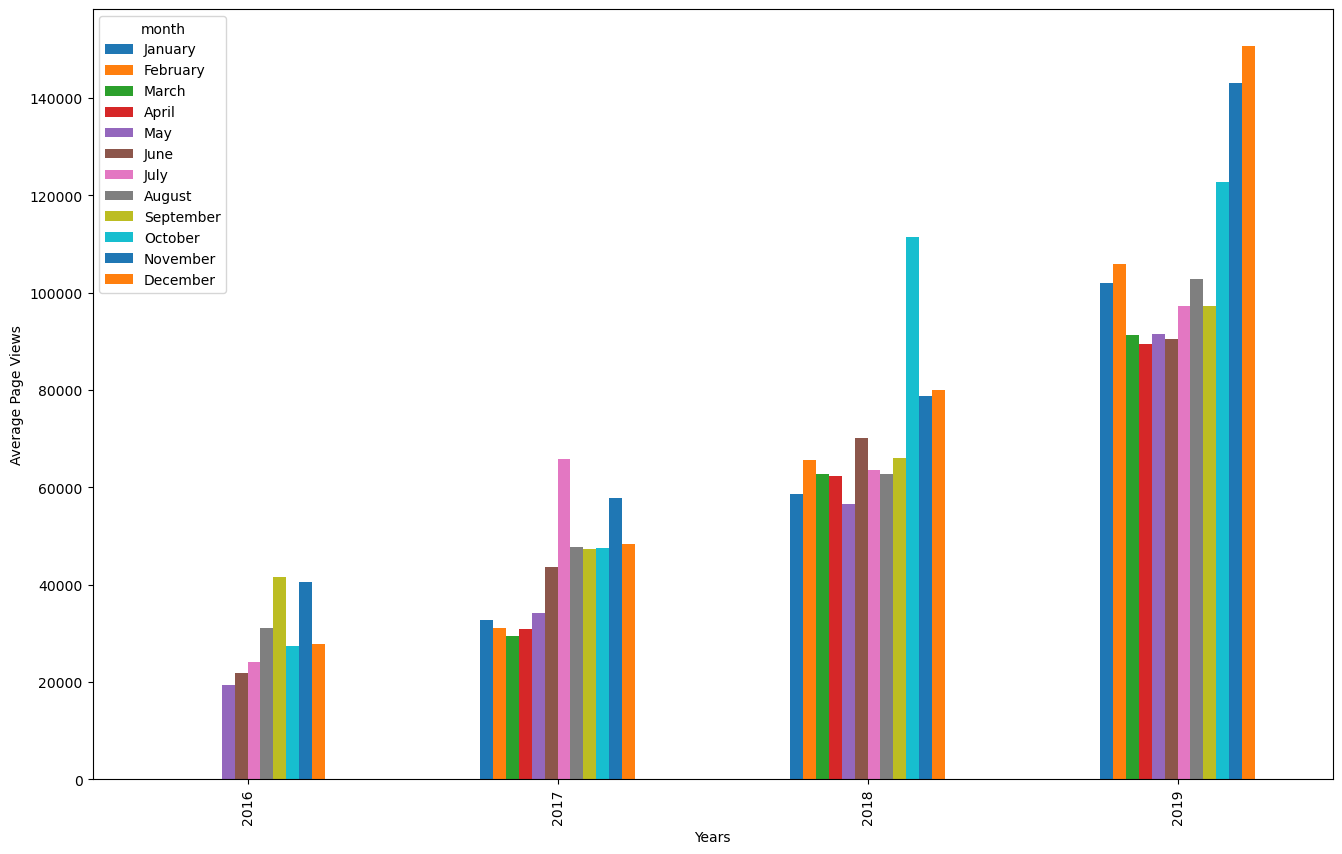

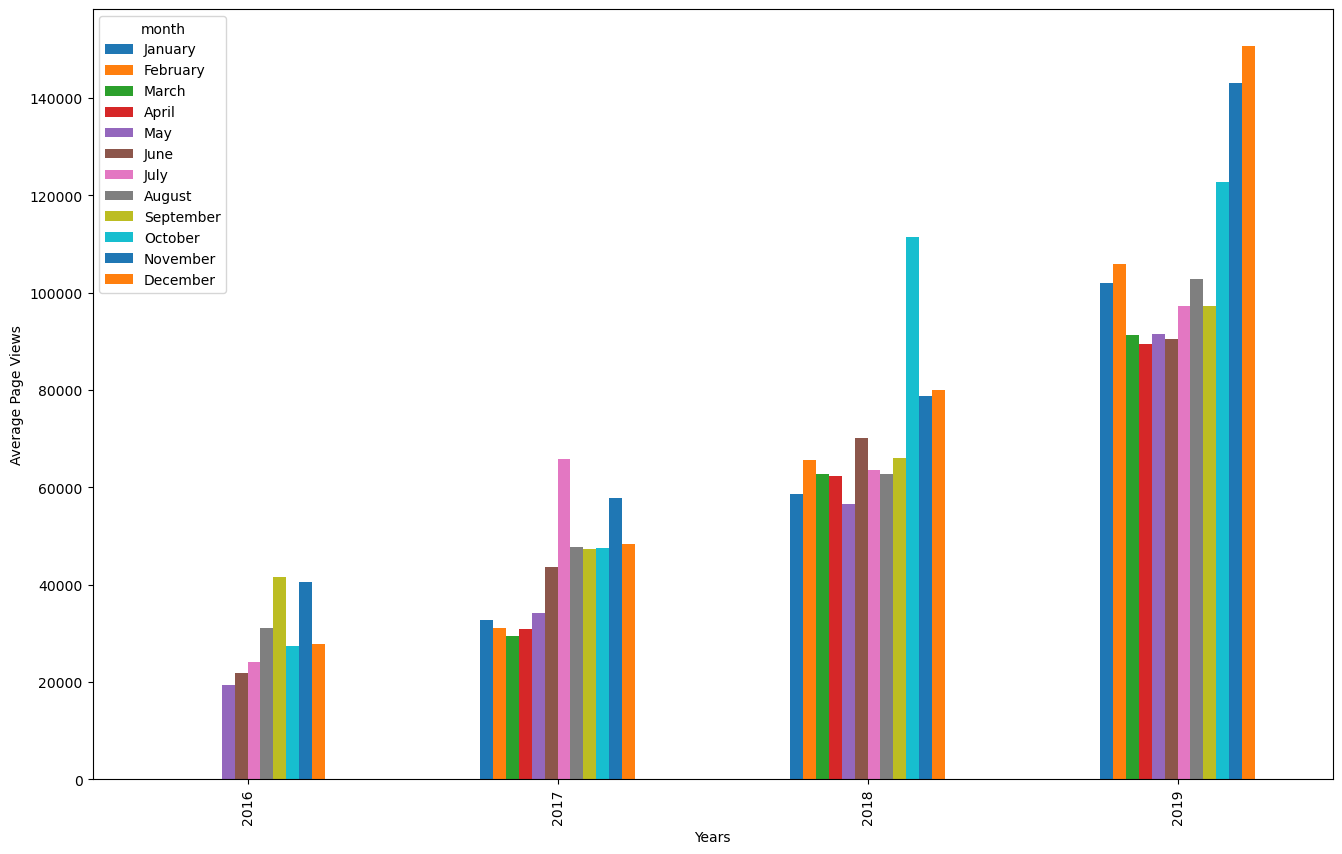

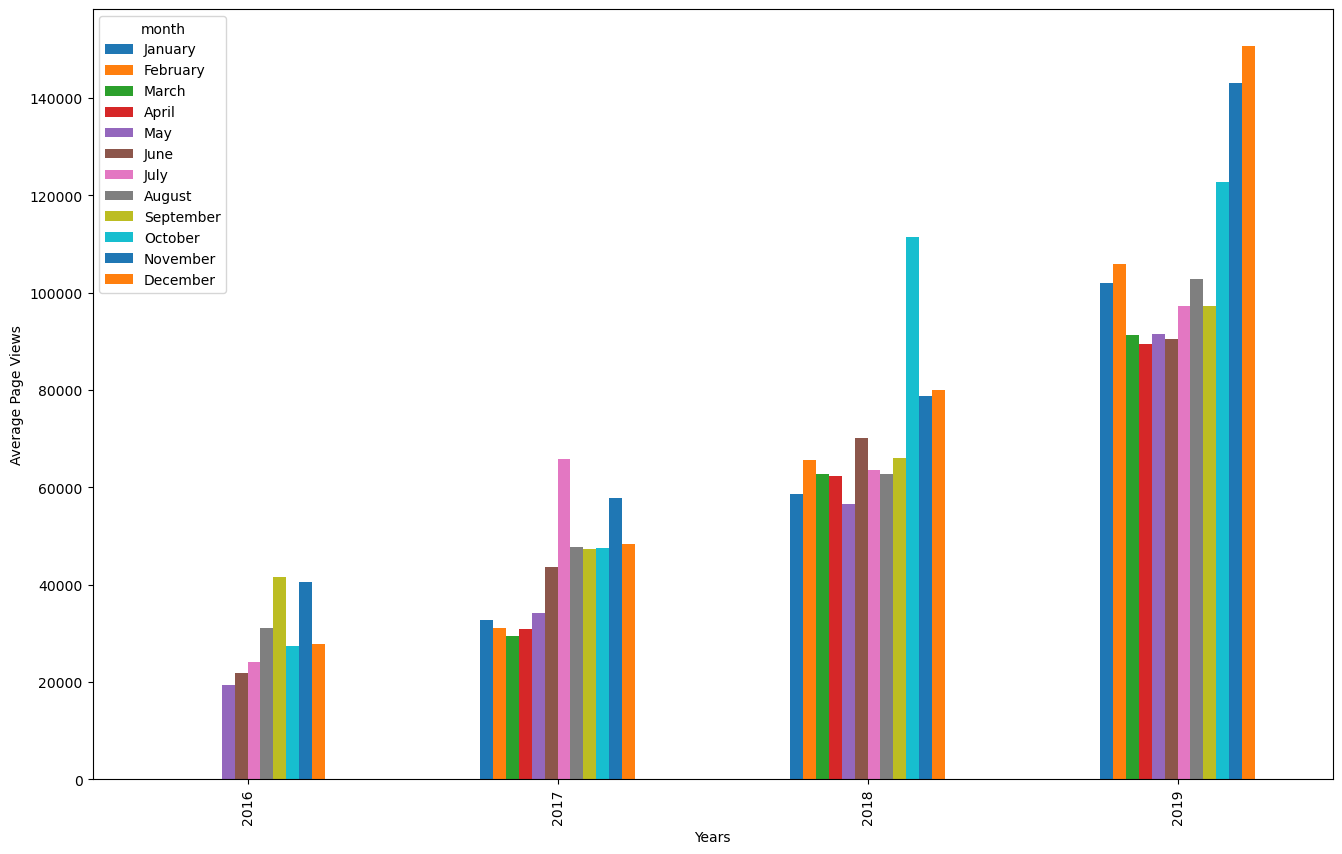

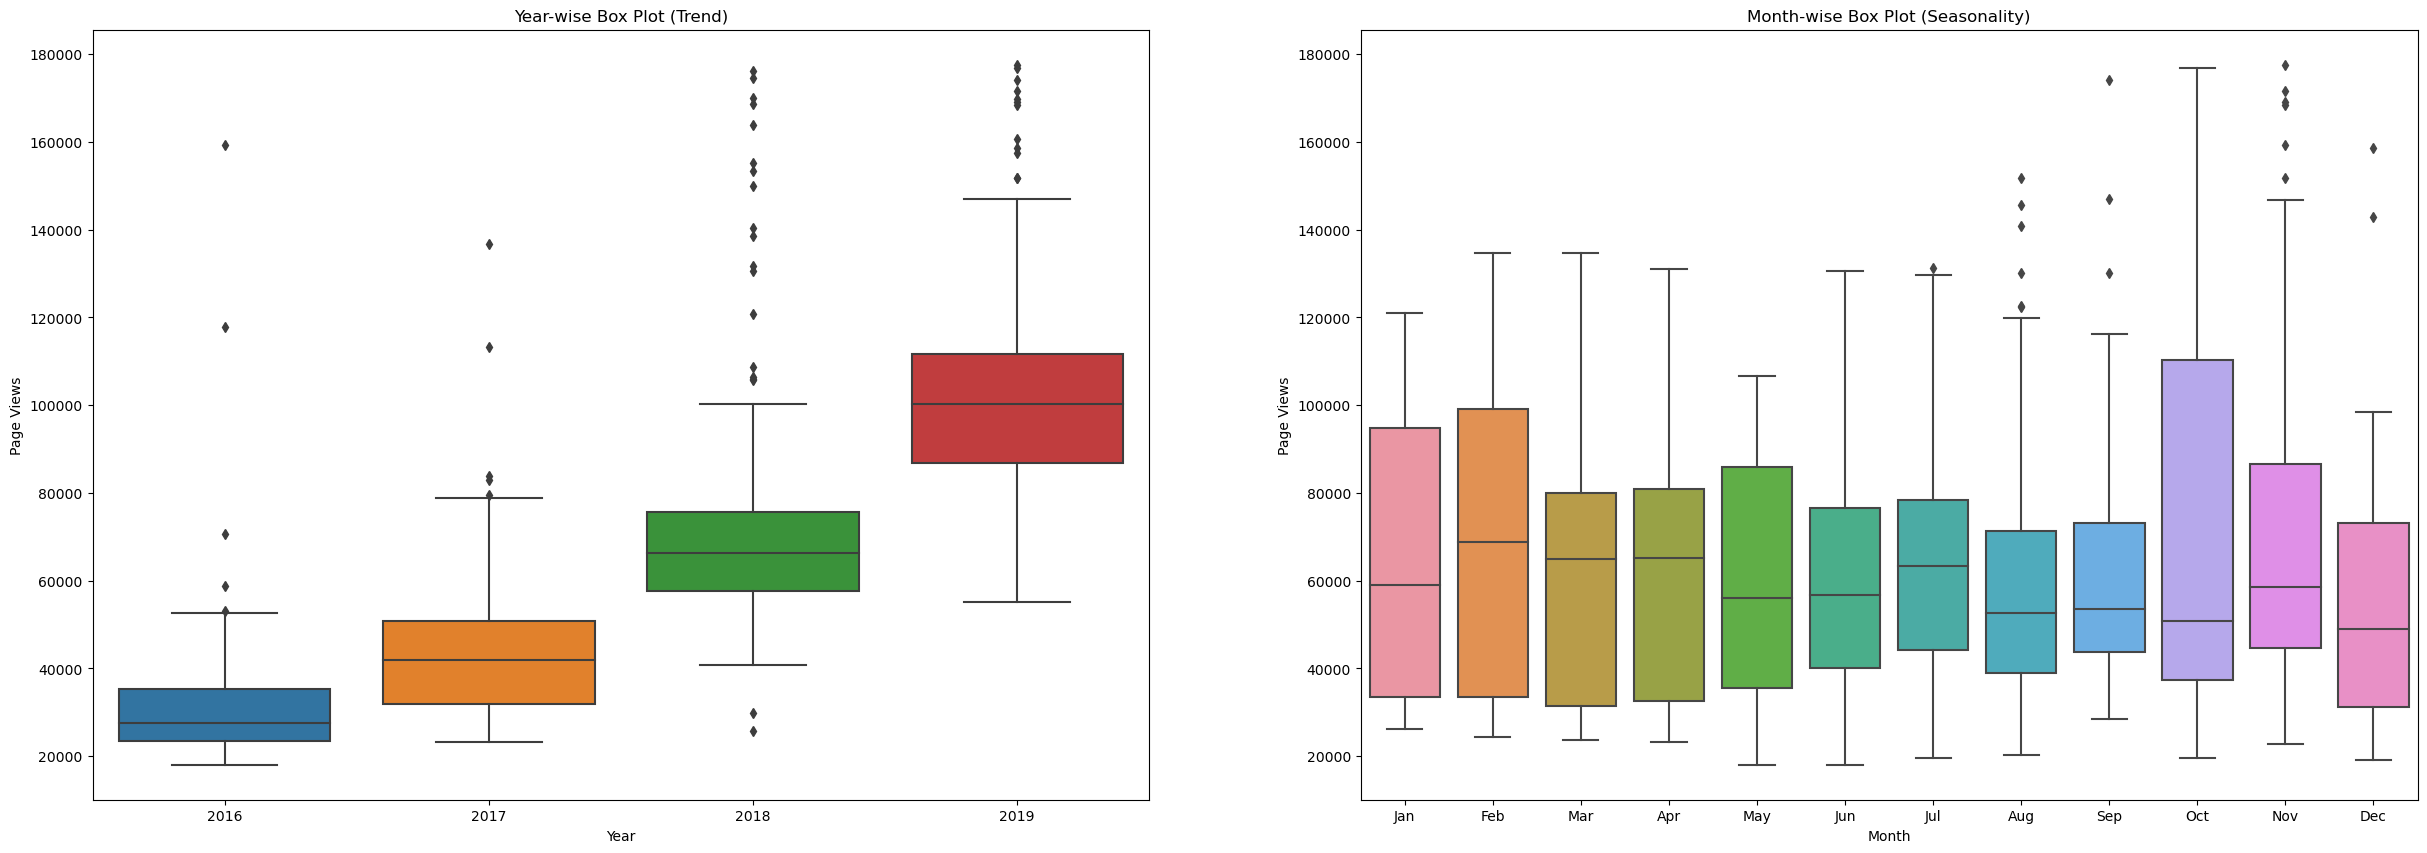

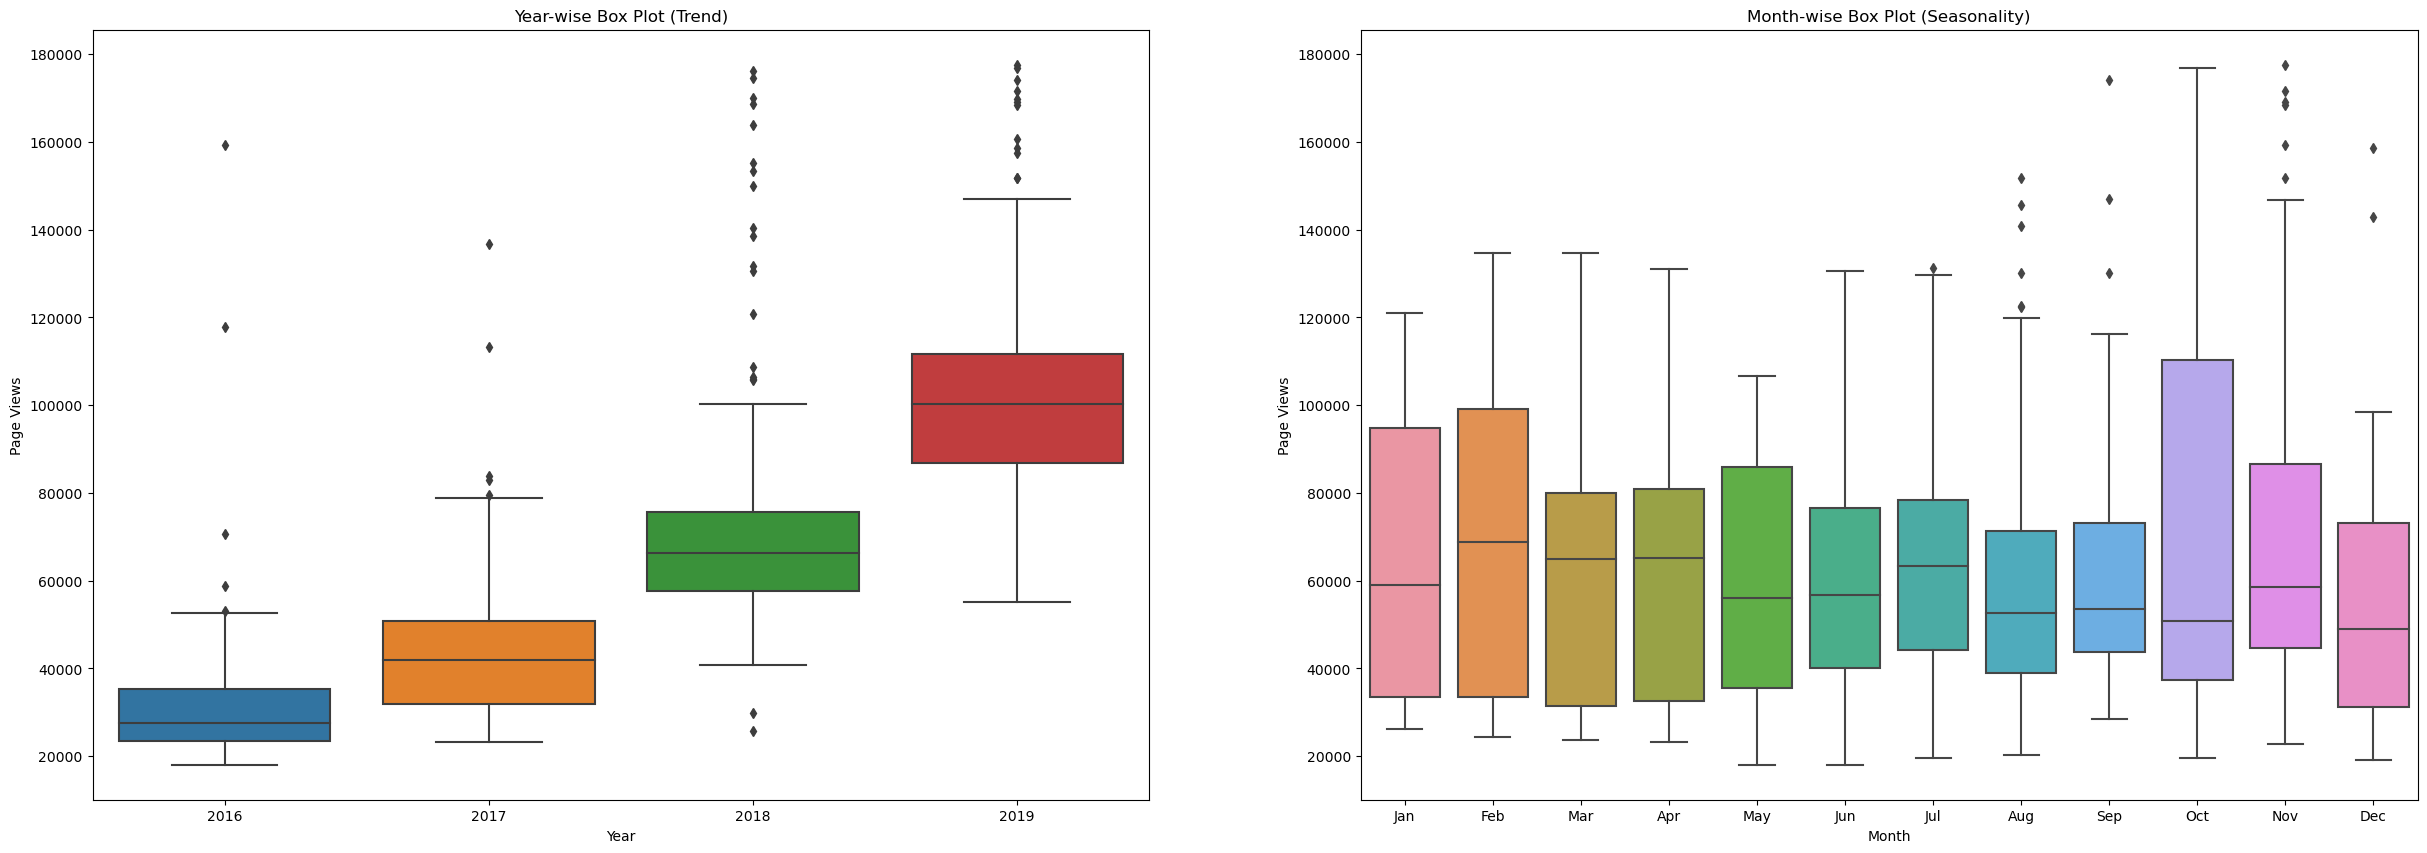

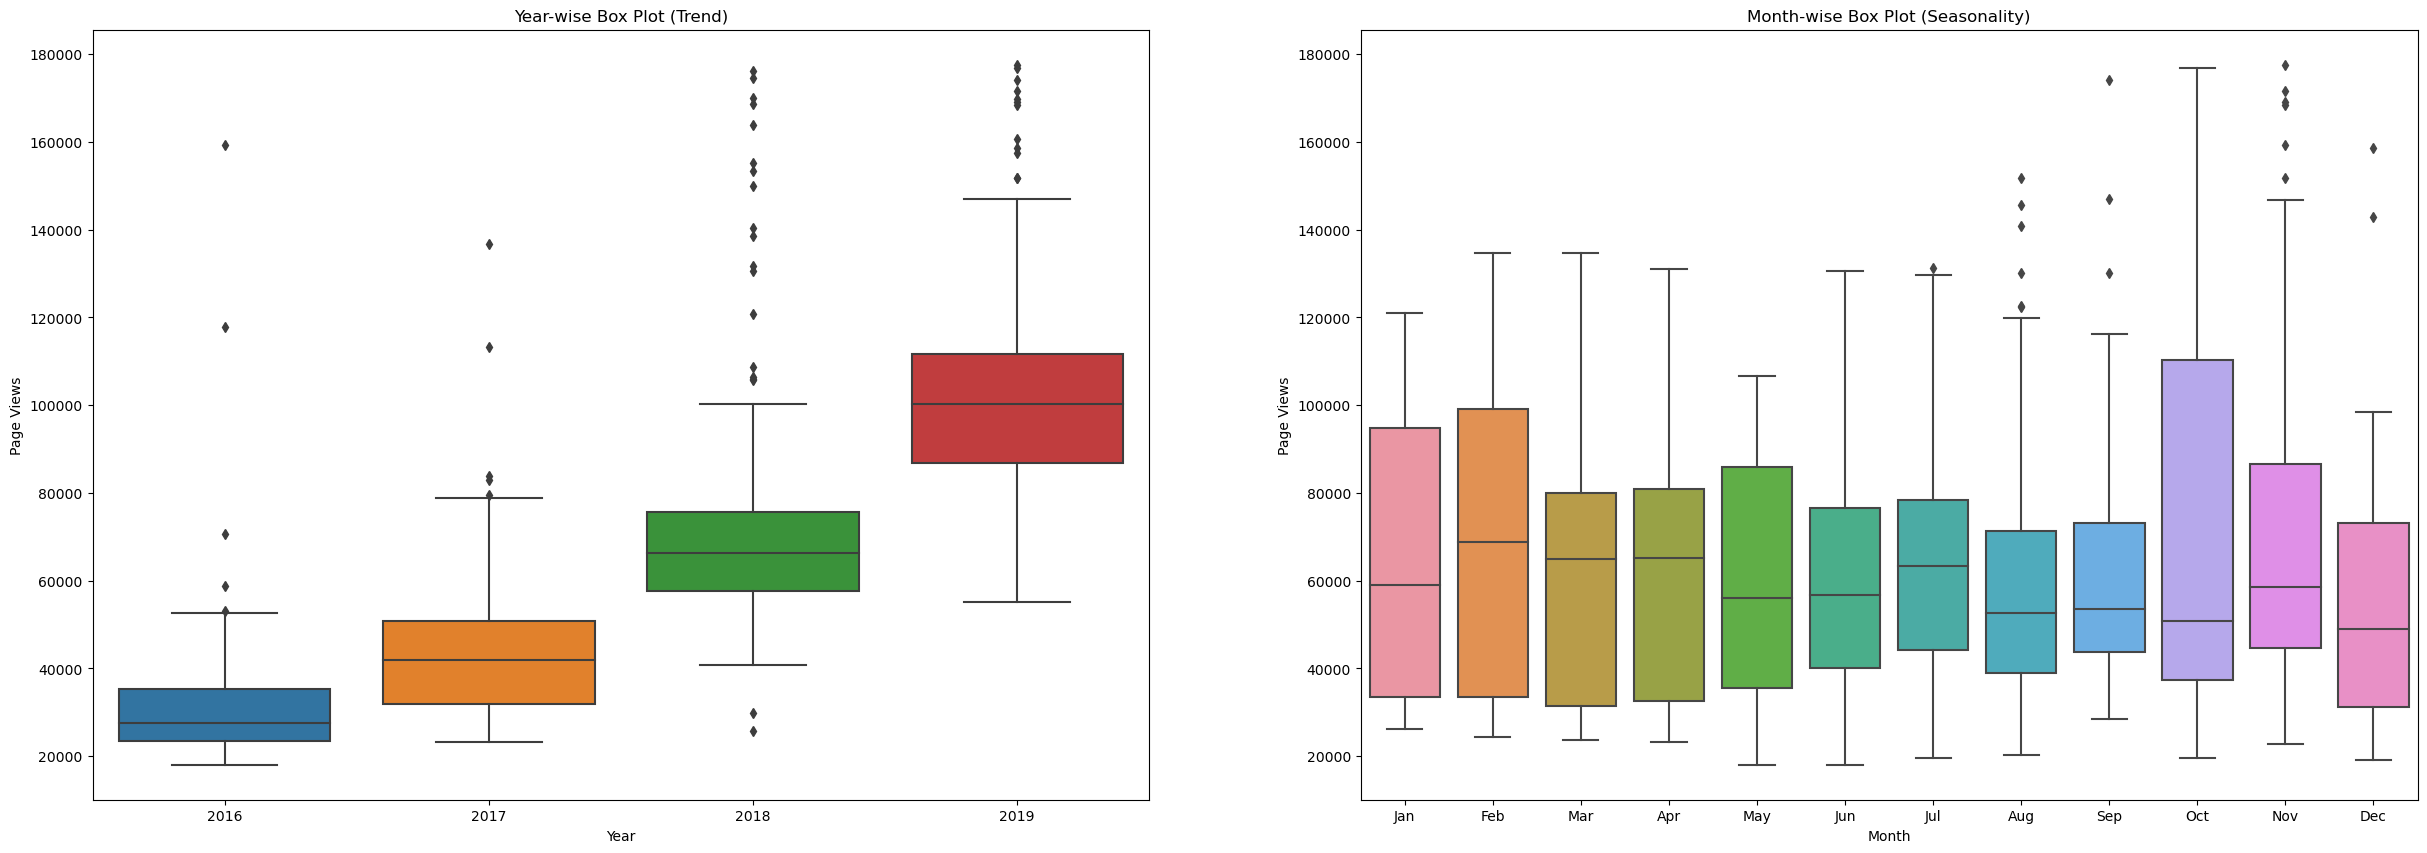

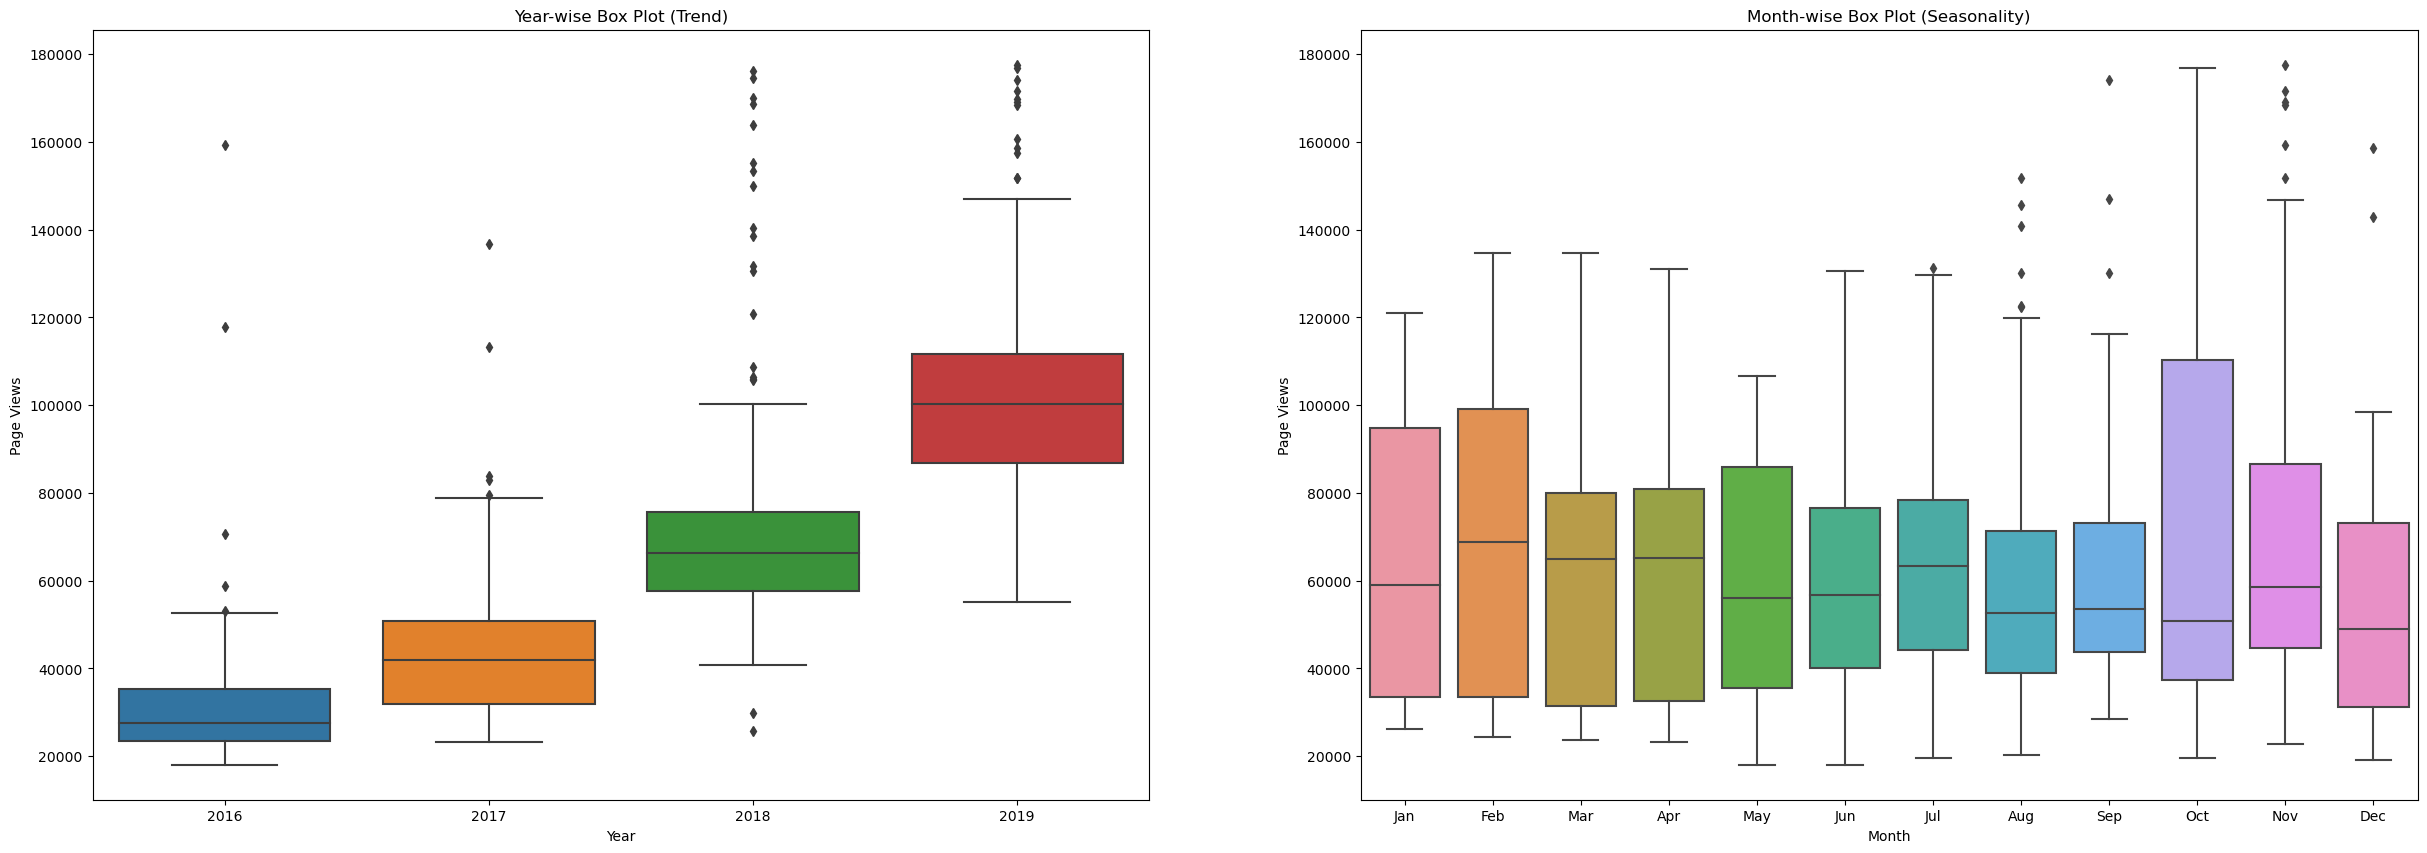

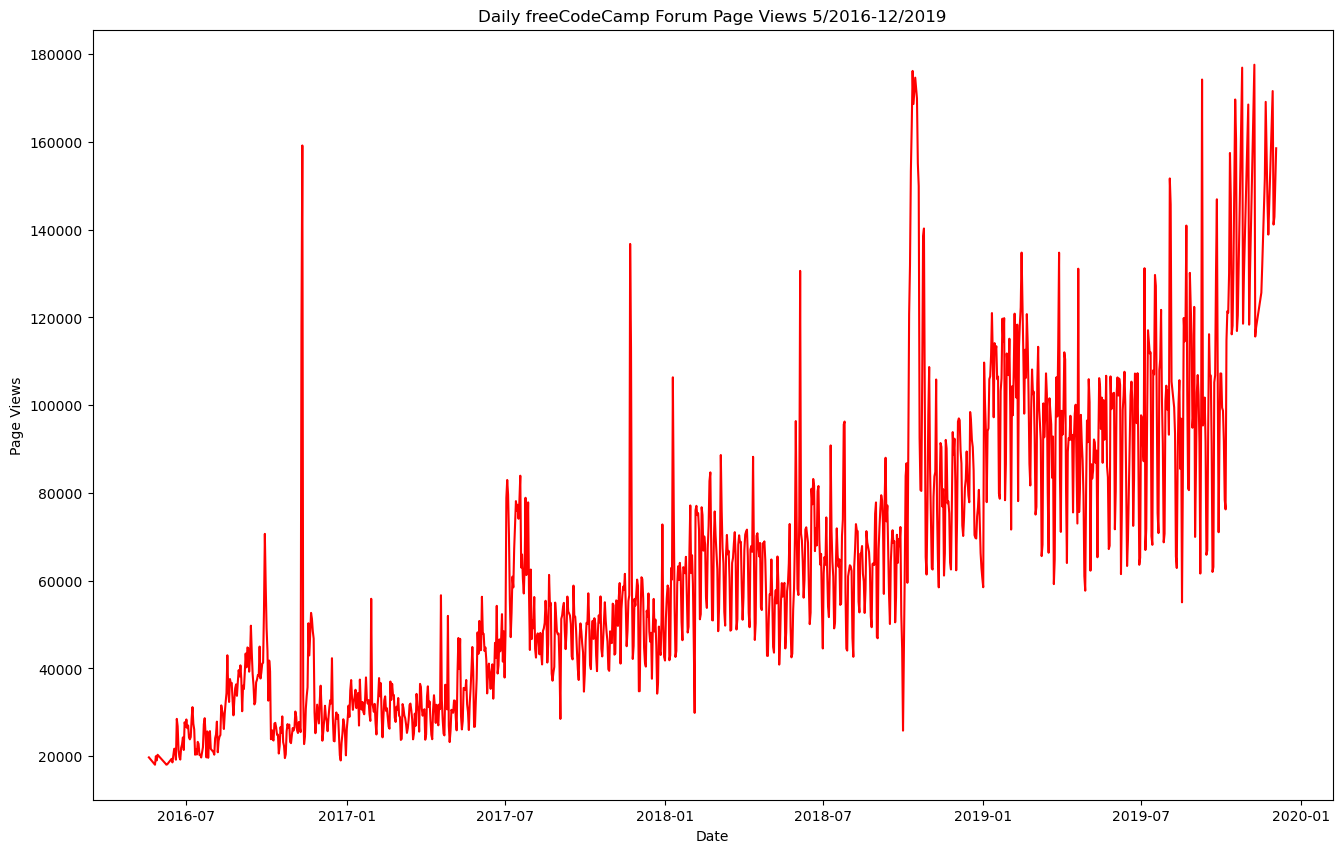

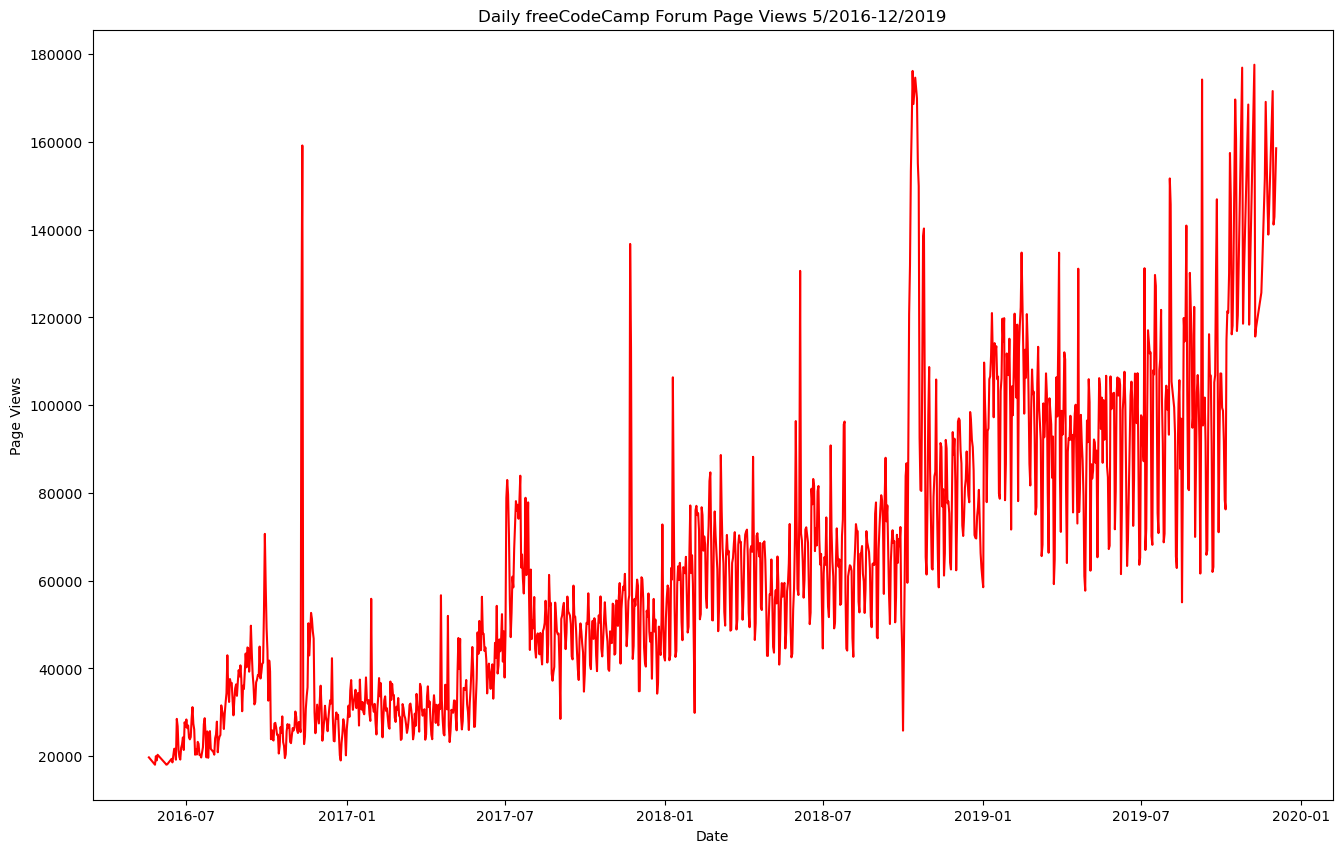

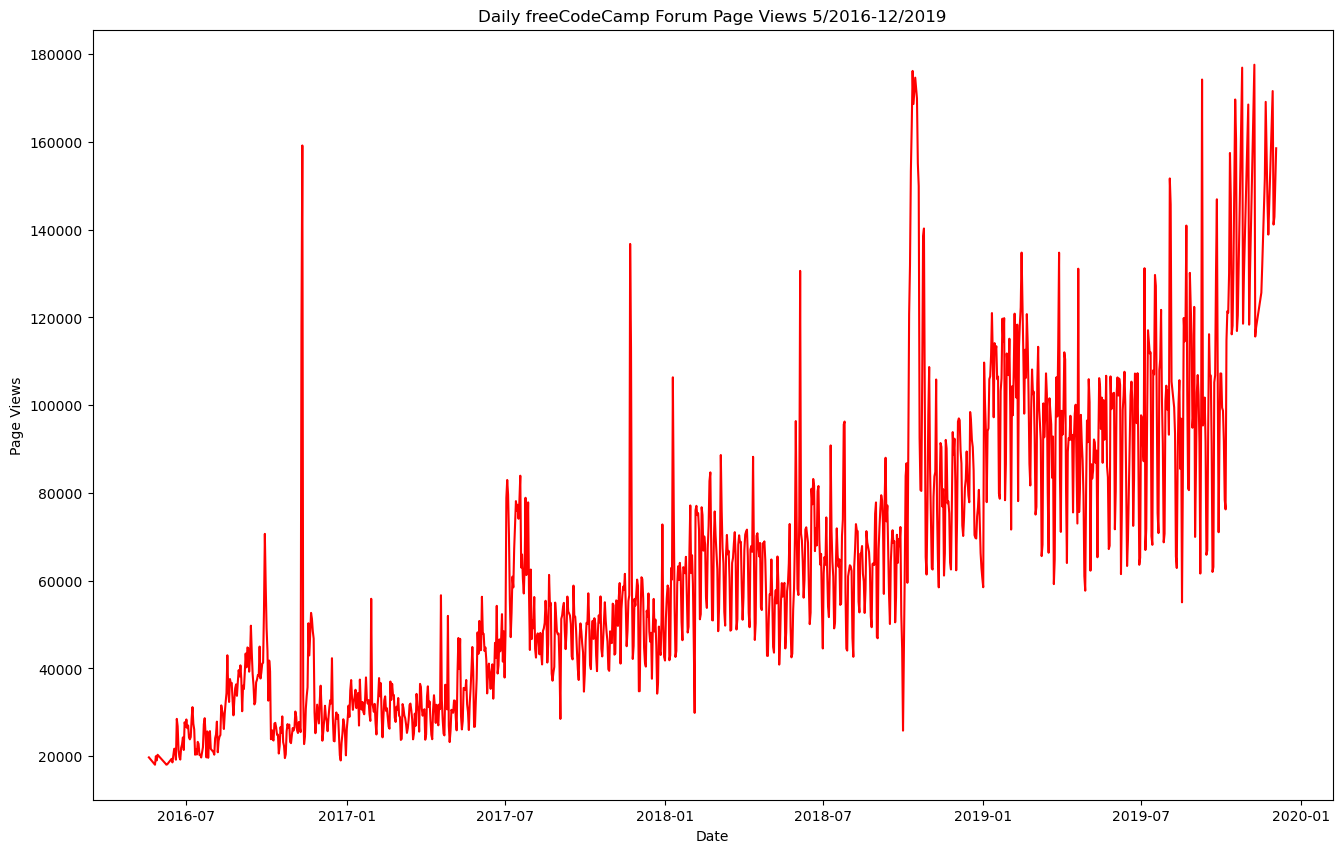

In [15]:
%run main.py